In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
# Load Dataset
df=pd.read_csv("../data/cleaned_data.csv")

In [3]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [4]:
# Split Training & Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Random Forest Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Random Forest ROC AUC: 0.6933455332322139


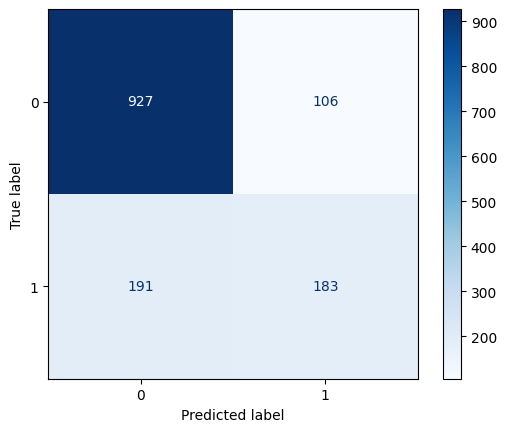

In [5]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest ROC AUC:", roc_auc_score(y_test, y_pred_rf))

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap="Blues")
plt.show()

In [6]:
# XGBoost
import xgboost as xgb
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))
print("XGBoost ROC AUC:", roc_auc_score(y_test, y_pred_xgb))

XGBoost Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.59      0.55      0.57       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407

XGBoost ROC AUC: 0.7048482950339336


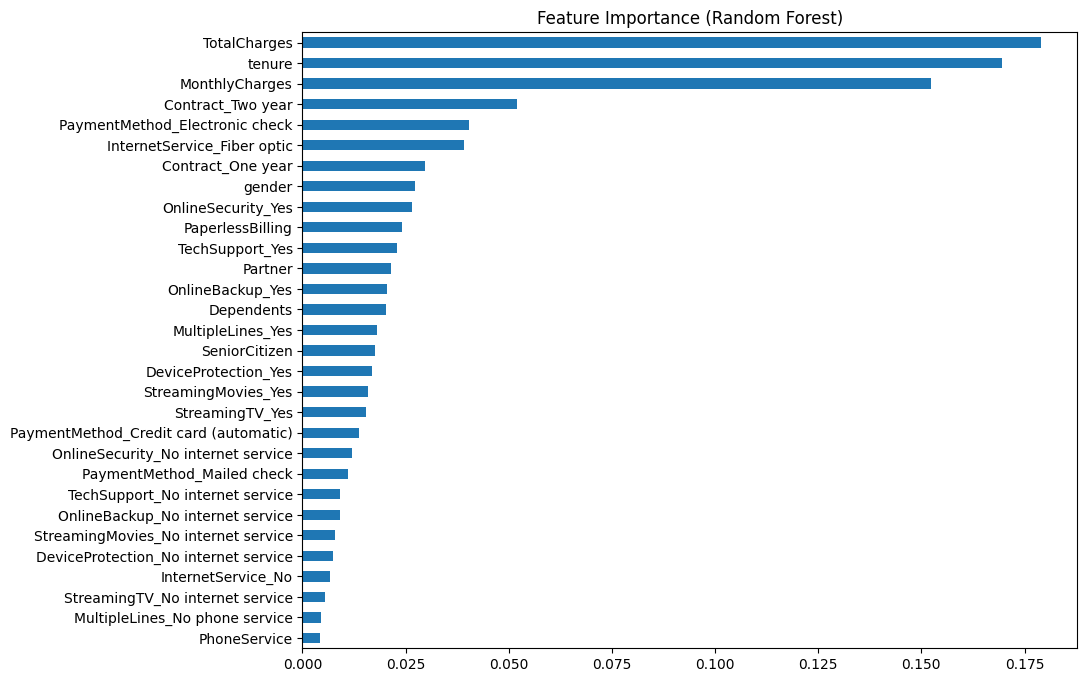

In [7]:
# Feature Importance (Random Forest)
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_imp.sort_values().plot(kind='barh', figsize=(10,8))
plt.title("Feature Importance (Random Forest)")
plt.show()

In [8]:
# Save the best model (choose based on performance)
joblib.dump(xgb_model, "../results/model.pkl")

['../results/model.pkl']